## Converting fluid inclusion densities to depths
- Note, you will have to have CoolProp installed for this to work, if you have python installed through anaconda, conda install -c conda-forge coolprop in the command line normally works well

In [7]:
import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

## Can load data with temperature, and either density or splitting

In [8]:
FIs=pd.read_excel('Fluid_Inclusion_Data.xlsx', sheet_name='Sheet1')
FIs.head()

,Sample,T_K,Density_g_cm3,Corrected_Splitting
0,sample1,1200,0.21,103.0
1,sample2,1250,0.10,105.0
2,sample3,1210,0.05,103.4
3,sample4,1300,0.45,104.0
4,sample5,1410,0.60,104.5


## Say you had splittings not density here, you can use the Cornell densimeter

In [16]:
Density=pf.calculate_density_cornell(temp='SupCrit', 
                                     Split=FIs['Corrected_Splitting'])
Density.head()

,Preferred D,in range,Notes,LowD_RT,HighD_RT,LowD_SC,MedD_SC,HighD_SC,Temperature,Splitting,Preferred_D
0,0.105218,Y,"SupCrit, low density",0.099243,-0.241461,0.105218,0.105428,-0.213159,SupCrit,103.0,NaN
1,0.958563,N,Above upper Cali Limit,0.845759,0.951735,0.857304,1.019152,0.958563,SupCrit,105.0,NaN
2,0.266632,Y,"SupCrit, Med density",0.248547,0.090640,0.255635,0.266632,0.118109,SupCrit,103.4,NaN
3,0.539863,Y,"SupCrit, Med density",0.472501,0.501171,0.481261,0.539863,0.524145,SupCrit,104.0,NaN
4,0.779215,Y,"SupCrit, high density",0.659130,0.762961,0.669282,0.780920,0.779215,SupCrit,104.5,NaN


In [21]:
# Then append to the dataframe
FIs['Density_g_cm3']=Density['Preferred D']

## First, just calculate densities

In [23]:
Densities=pf.convert_density_depth_Coolprop(T_K=FIs['T_K'], 
                                   Crust_dens_gcm3=2.7,
                CO2_dens_gcm3=FIs['Density_g_cm3'], output='df')
Densities.head()

,Pressure (kbar),Pressure (MPa),Depth (km),input_Crust_dens_gcm3,MC_T_K,MC_CO2_dens_gcm3
0,0.253387,25.338696,0.956647,2.7,1200,0.105218
1,6.493570,649.356977,24.516064,2.7,1250,0.958563
2,0.729328,72.932828,2.753533,2.7,1210,0.266632
3,2.144942,214.494212,8.098094,2.7,1300,0.539863
4,4.645510,464.551047,17.538832,2.7,1410,0.779215


## Monte Carlo Simulations for each FI
- Here, the error is the same for every FI, e.g. a set value, such as +-30K from a thermometer

In [24]:
Av_df=pf.loop_all_FI_MC(df=FIs,  crust_dens_gcm3=2.7, N_dup=1000,
                error_T_K=30, error_CO2_dens=0.005, error_crust_dens=0.1,
                error_type_T_K='Abs', error_dist_T_K='normal',
                error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
                error_type_crust_dens='Abs', 
                error_dist_crust_dens='uniform',
                plot_figure=False)
Av_df

working on number0
working on number1
working on number2
working on number3
working on number4
working on number5
working on number6
working on number7
working on number8
working on number9
working on number10


,Filename,SingleFI_D_km,std_dev_MC_D_km,SingleFI_P_kbar,std_dev_MC_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,error_T_K,error_CO2_dens,error_crust_dens
0,sample1,0.956647,0.058890,0.253387,0.014885,0.253567,0.253420,0.956916,0.955008,30,0.005,0.1
1,sample2,24.516064,0.851422,6.493570,0.174509,6.502475,6.500474,24.565503,24.566564,30,0.005,0.1
2,sample3,2.753533,0.115085,0.729328,0.026658,0.729672,0.729704,2.756525,2.758092,30,0.005,0.1
3,sample4,8.098094,0.317800,2.144942,0.069584,2.146547,2.145547,8.104113,8.090920,30,0.005,0.1
4,sample5,17.538832,0.583010,4.645510,0.124690,4.646176,4.646123,17.549982,17.538228,30,0.005,0.1
5,sample6,8.512145,0.340446,2.254612,0.076194,2.255691,2.259479,8.521211,8.515380,30,0.005,0.1
6,sample7,31.030623,1.011307,8.219081,0.196352,8.223994,8.225885,31.087008,31.059001,30,0.005,0.1
7,sample8,3.644554,0.152007,0.965333,0.032690,0.966159,0.965754,3.643643,3.638322,30,0.005,0.1
8,sample9,1.126425,0.067543,0.298356,0.016689,0.298666,0.298446,1.127715,1.123747,30,0.005,0.1
9,sample10,3.502440,0.135957,0.927691,0.029681,0.928601,0.928199,3.509533,3.507323,30,0.005,0.1


## Using a different error for each fluid inclusion (e.g. percentage error based on Temperature, or density)

In [25]:
Av_df=pf.loop_all_FI_MC(df=FIs, crust_dens_gcm3=2.7, N_dup=1000,
                error_T_K=FIs['T_K']*0.05, error_CO2_dens=FIs['Density_g_cm3']*0.1, 
                error_crust_dens=0.1,
                error_type_T_K='Abs', error_dist_T_K='normal',
                error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
                error_type_crust_dens='Abs', 
                error_dist_crust_dens='uniform',
                plot_figure=False)
Av_df

working on number0
working on number1
working on number2
working on number3
working on number4
working on number5
working on number6
working on number7
working on number8
working on number9
working on number10


,Filename,SingleFI_D_km,std_dev_MC_D_km,SingleFI_P_kbar,std_dev_MC_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,error_T_K,error_CO2_dens,error_crust_dens
0,sample1,0.956647,0.113326,0.253387,0.029479,0.254689,0.253282,0.962533,0.954702,60.0,0.010522,0.1
1,sample2,24.516064,1.464874,6.493570,0.364590,6.508124,6.507822,24.599576,24.599104,60.0,0.010522,0.1
2,sample3,2.753533,0.210473,0.729328,0.053101,0.730962,0.730577,2.761510,2.756813,60.0,0.010522,0.1
3,sample4,8.098094,0.540181,2.144942,0.136169,2.143281,2.140823,8.089403,8.076466,60.0,0.010522,0.1
4,sample5,17.538832,0.958499,4.645510,0.237882,4.646966,4.653956,17.547869,17.554137,60.0,0.010522,0.1
5,sample6,8.512145,0.602950,2.254612,0.150214,2.259571,2.257313,8.541850,8.540191,60.0,0.010522,0.1
6,sample7,31.030623,1.553138,8.219081,0.376372,8.225976,8.230515,31.048687,31.078613,60.0,0.010522,0.1
7,sample8,3.644554,0.269705,0.965333,0.067644,0.968684,0.966825,3.658861,3.644356,60.0,0.010522,0.1
8,sample9,1.126425,0.139522,0.298356,0.036374,0.297678,0.297902,1.124589,1.126830,60.0,0.010522,0.1
9,sample10,3.502440,0.241588,0.927691,0.060103,0.929323,0.929945,3.514063,3.511296,60.0,0.010522,0.1


## You can also run a single sample to make, say a supplementary plot

### here we look at sample 4

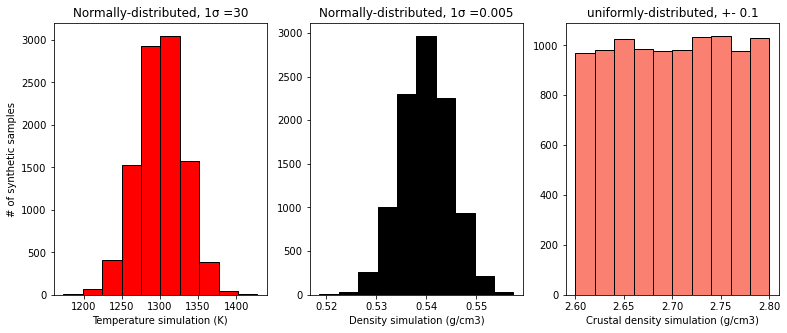

In [28]:
df_synthetic=pf.calculate_temperature_density_MC(df=FIs, sample_i=3,
crust_dens_gcm3=2.7, N_dup=10000,
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
error_CO2_dens=0.005, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_crust_dens=0.1, error_type_crust_dens='Abs', error_dist_crust_dens='uniform' )


df_synthetic.head()

plt.savefig('Distributions.png', dpi=300)

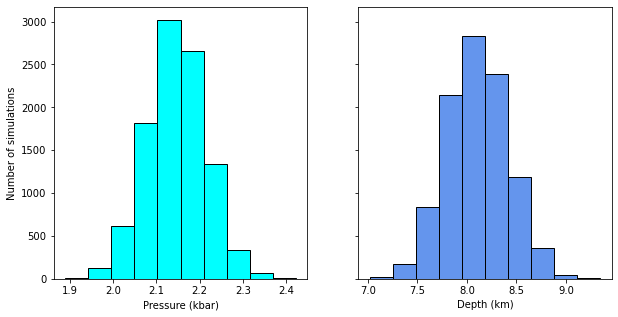

In [29]:
MC_T=pf.convert_density_depth_Coolprop(T_K=df_synthetic['T_K_with_noise'], 
                                    CO2_dens_gcm3=df_synthetic['CO2_dens_with_noise'], 
                                   Crust_dens_gcm3=df_synthetic['crust_dens_with_noise'],
                                     output='df')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.hist(MC_T['Pressure (kbar)'], color='cyan', ec='k')
ax2.hist(MC_T['Depth (km)'], color='cornflowerblue', ec='k')
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('Number of simulations')
plt.savefig('Distribution_Press.png', dpi=300)

### Here we look at sample 5

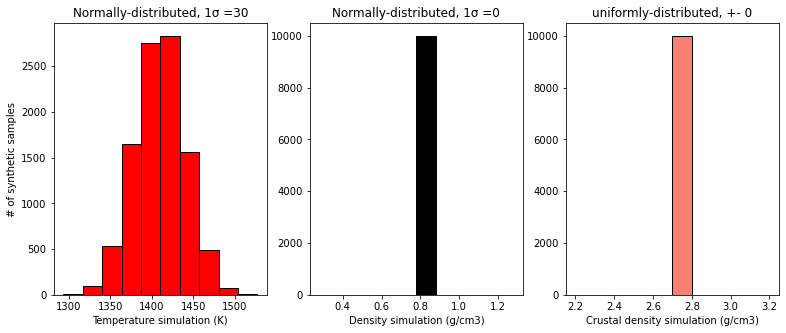

In [31]:
df_synthetic=pf.calculate_temperature_density_MC(df=FIs, sample_i=4,
crust_dens_gcm3=2.7, N_dup=10000,
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
error_CO2_dens=0, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_crust_dens=0, error_type_crust_dens='Abs', error_dist_crust_dens='uniform' )


df_synthetic.head()

plt.savefig('Distributions.png', dpi=300)

In [32]:
MC_T=pf.convert_density_depth_Coolprop(T_K=df_synthetic['T_K_with_noise'], 
                                    CO2_dens_gcm3=df_synthetic['CO2_dens_with_noise'], 
                                   Crust_dens_gcm3=df_synthetic['crust_dens_with_noise'],
                                     output='df')

Text(0, 0.5, 'Temperature (K)')

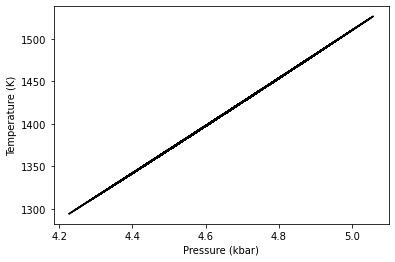

In [33]:
plt.plot(MC_T['Pressure (kbar)'], MC_T['MC_T_K'], '-k')
plt.xlabel('Pressure (kbar)')
plt.ylabel('Temperature (K)')